In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
np.random.seed(0)
mu_rewards = np.random.randn(10)*10
mu_rewards = [np.round(reward, decimals=2) for reward in mu_rewards]
print(mu_rewards)

[17.64, 4.0, 9.79, 22.41, 18.68, -9.77, 9.5, -1.51, -1.03, 4.11]


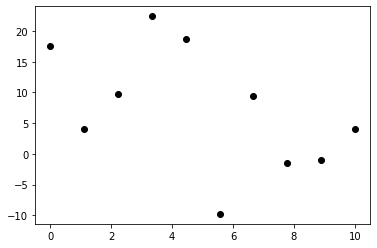

In [52]:
x = np.linspace(0, 10, 10)
plt.plot(x, mu_rewards, 'o', color='black');

In [53]:
#Function for generating the reward with the given mu and variance
def generate_reward(index, std_dev):
    return np.round(np.random.normal(mu_rewards[index], std_dev), decimals=2)

### Making sure the rewards generated are normally distributed

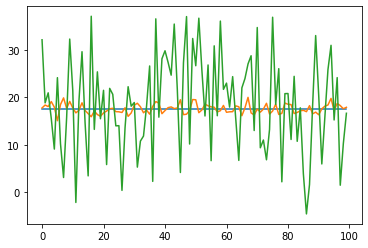

In [54]:
#Checking the working on plot
rewards_std_1 = []
rewards_std_10 = []

for i in range(100):
    reward_std_1 = generate_reward(0, 1)
    reward_std_10 = generate_reward(0, 10)
    rewards_std_1.append(reward_std_1)
    rewards_std_10.append(reward_std_10)

plt.plot([mu_rewards[0]]*100)
plt.plot(rewards_std_1)
plt.plot(rewards_std_10)

In [55]:
def generate_action():
    action = np.random.randint(low=0, high=9)
    return action

In [56]:
actions = []
for i in range(100):
    actions.append(generate_action())
print(actions)

[8, 2, 7, 8, 4, 4, 1, 7, 6, 4, 1, 5, 7, 1, 3, 5, 7, 3, 6, 6, 7, 1, 6, 0, 3, 8, 4, 1, 4, 5, 0, 3, 1, 4, 4, 4, 0, 0, 8, 4, 6, 3, 3, 2, 1, 2, 1, 3, 4, 1, 1, 0, 7, 8, 4, 3, 5, 6, 3, 2, 8, 1, 4, 0, 8, 3, 5, 5, 1, 7, 8, 6, 4, 7, 3, 5, 3, 6, 4, 7, 3, 0, 5, 3, 7, 5, 5, 8, 0, 8, 3, 6, 3, 2, 7, 0, 3, 0, 3, 6]


In [57]:
def simulation_for_one_instant_greedy(std_dev):
    Qt = []
    Q = [0]*10
    N = [0]*10
    action = generate_action()
    for i in range(1000):
        reward = generate_reward(action, std_dev)
        N[action] += 1
        Q[action] = Q[action] + (1/N[action])*(reward-Q[action])
        Qt.append(Q[action])
    return Q, N, Qt

In [58]:
Q1_greedy, N1_greedy, Qt1_greedy = simulation_for_one_instant_greedy(1)
Q2_greedy, N2_greedy, Qt2_greedy = simulation_for_one_instant_greedy(10)
print(Q1_greedy)
print(Q2_greedy)

[0, 4.017360000000001, 0, 0, 0, 0, 0, 0, 0, 0]
[17.588330000000006, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
x = np.linspace(0, 1000, 1000)
plt.figure(figsize=(10, 10))
plt.plot(x, Qt1_greedy)
plt.plot(x, Qt2_greedy)
plt.title('Greedy plot for two different std_deviations 1, 10')

Function to generate one instant of greedy epsilon function. 

In [60]:
def simulation_for_one_greedy_epsilon(epsilon, std_dev):
    Qt = []
    Q = [0]*10
    N = [0]*10
    optmial_action = []
    not_explored_actions = [i for i in range(10)]
    for i in range(1000):
        prob = np.random.rand()
        if(len(not_explored_actions) > 0):
            if prob <= epsilon:
                action = np.random.choice(not_explored_actions)
                index = not_explored_actions.index(action)
                not_explored_actions.pop(index)
            else:
                action = np.argmax(Q)
        else:
            action = np.argmax(Q)
        if(action == 3):
            optmial_action.append(1)
        else:
            optmial_action.append(0)
        reward = generate_reward(action, std_dev)
        N[action] += 1
        Q[action] = Q[action] + (1/N[action])*(reward-Q[action])
        Qt.append(Q[action])
    return Q, N, Qt, optmial_action

In [61]:
epsilon = 0.5
Q1_ge, N1_ge, Qt1_ge, _ = simulation_for_one_greedy_epsilon(epsilon, 1)
Q2_ge, N2_ge, Qt2_ge, _ = simulation_for_one_greedy_epsilon(epsilon, 10)
print(Q1_ge)
print(Q2_ge)

[17.759999999999998, 4.39, 10.52, 22.396510681586985, 18.52, -8.29, 9.27, -1.8, -1.25, 3.32]
[20.634999999999998, 14.1, -7.54, 22.67132323232323, 19.8, -18.61, 17.09, -8.61, 17.52, 4.97]


In [ ]:
x = np.linspace(0, 1000, 1000)
plt.figure(figsize=(10, 10))
plt.plot(x, Qt1_ge)
plt.plot(x, Qt2_ge)
plt.title('Greedy epsilon sinle simulation plot with Reward(mu, 0) and Reward(mu, 10)')

In [63]:
def generate_optmial_actions(index, std_dev):
    rewards = []
    Qt_multiple = []
    for i in range(2000):
        Q = [0]*10
        N = [0]*10
        
        for j in range(1000):
            reward = generate_reward(index, std_dev)
            N[action] += 1
            Q[action] = Q[action] + (1/N[action])*(reward-Q[action])
            Qt.append(Q[action])
        Qt_multiple.append(Qt)
    Qt_avg = np.array(Qt_multiple).mean(axis=0)
    return Qt_avg

In [64]:
def generate_multiple_simulations_greedy(std_dev):
    Qt_multiple = []
    for i in range(2000):
        _, _, Qt = simulation_for_one_instant_greedy(std_dev)
        Qt_multiple.append(Qt)
    Qt_multiple = np.array(Qt_multiple)
    averageQt = Qt_multiple.mean(axis=0)
    return averageQt

In [65]:
average_Qt_1 = generate_multiple_simulations_greedy(1)
average_Qt_10 = generate_multiple_simulations_greedy(10)

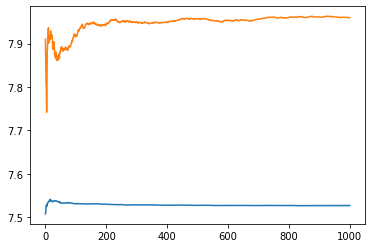

In [66]:
x = np.linspace(0, 1000, 1000)
plt.plot(x, average_Qt_1)
plt.plot(x, average_Qt_10)

In [67]:
def generate_multiple_simulations_greedy_epsilon(epsilon, std_dev):
    Qt_multiple = []
    optimal_actions = []
    for i in range(2000):
        _, _, Qt, optimal_action = simulation_for_one_greedy_epsilon(epsilon, std_dev)
        Qt_multiple.append(Qt)
        optimal_actions.append(optimal_action)
    Qt_multiple = np.array(Qt_multiple)
    optimal_actions = np.array(optimal_actions)
    average_Qt = Qt_multiple.mean(axis=0)
    actions_p = optimal_actions.sum(axis=0)
    return average_Qt, actions_p

In [68]:
epsilon = 0.1
average_Qt_1_ge, actions_p_1 = generate_multiple_simulations_greedy_epsilon(epsilon, 1)
#average_Qt_10_ge, actions_p_10 = generate_multiple_simulations_greedy_epsilon(epsilon, 10)

In [69]:
epsilon = 0.5
average_Qt_1_ge1, actions_p_12 = generate_multiple_simulations_greedy_epsilon(epsilon, 1)
#average_Qt_10_ge, actions_p_10 = generate_multiple_simulations_greedy_epsilon(epsilon, 10)

Text(0.5, 1.0, 'Optimal Action Plot for Epsilon = 0.1 and Epsilon = 0.5')

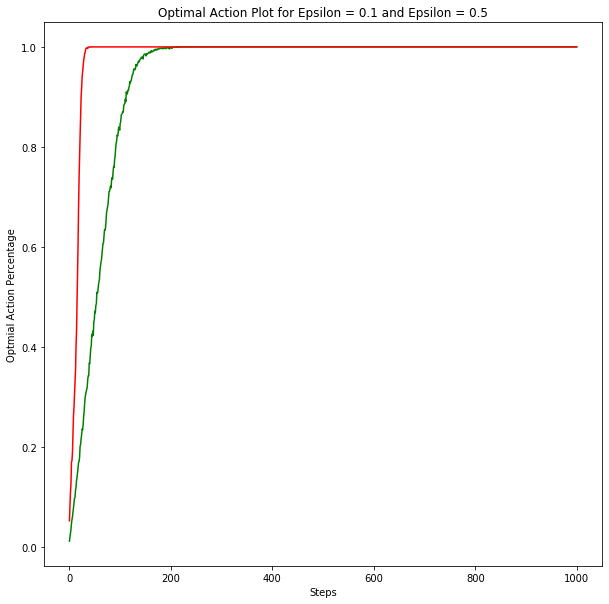

In [70]:
avg_actions_1 = actions_p_1/2000
avg_actions_10 = actions_p_12/2000
x = np.linspace(0, 1000, 1000)
plt.figure(figsize=(10, 10))
plt.plot(x, avg_actions_1, color='green')
plt.plot(x, avg_actions_10, color='red')
plt.xlabel('Steps')
plt.ylabel('Optmial Action Percentage')
plt.title('Optimal Action Plot for Epsilon = 0.1 and Epsilon = 0.5')

<b>The green color plot is for epsilon 0.1 and the red color plot is for epsilon 0.5 </b> This plot tells us that having higher values of epislon leads to more exploration and results in quick reach of optimal action. 

In [ ]:
#print(average_Qt_1)
#print(average_Qt_10)
x = np.linspace(0, 1000, 1000)
plt.figure(figsize=(10, 10))
plt.plot(x, average_Qt_1_ge)
plt.plot(x, average_Qt_1_ge1)
plt.xlabel('Steps')
plt.ylabel('Avergae Reward')

In [76]:
e = [0.5, 0.3, 0.2, 0.1, 0.05, 0.01 ]

Qt1_1, _ = generate_multiple_simulations_greedy_epsilon(e[0], 1)
Qt2_1, _ = generate_multiple_simulations_greedy_epsilon(e[1], 1)
Qt3_1, _ = generate_multiple_simulations_greedy_epsilon(e[2], 1)
Qt4_1, _ = generate_multiple_simulations_greedy_epsilon(e[3], 1)
Qt5_1, _ = generate_multiple_simulations_greedy_epsilon(e[4], 1)
Qt6_1, _ = generate_multiple_simulations_greedy_epsilon(e[5], 1)

Qt1_10, _ = generate_multiple_simulations_greedy_epsilon(e[0], 10)
Qt2_10, _ = generate_multiple_simulations_greedy_epsilon(e[1], 10)
Qt3_10, _ = generate_multiple_simulations_greedy_epsilon(e[2], 10)
Qt4_10, _ = generate_multiple_simulations_greedy_epsilon(e[3], 10)
Qt5_10, _ = generate_multiple_simulations_greedy_epsilon(e[4], 10)
Qt6_10, _ = generate_multiple_simulations_greedy_epsilon(e[5], 10)

Text(0.5, 1.0, 'e = 0.01')

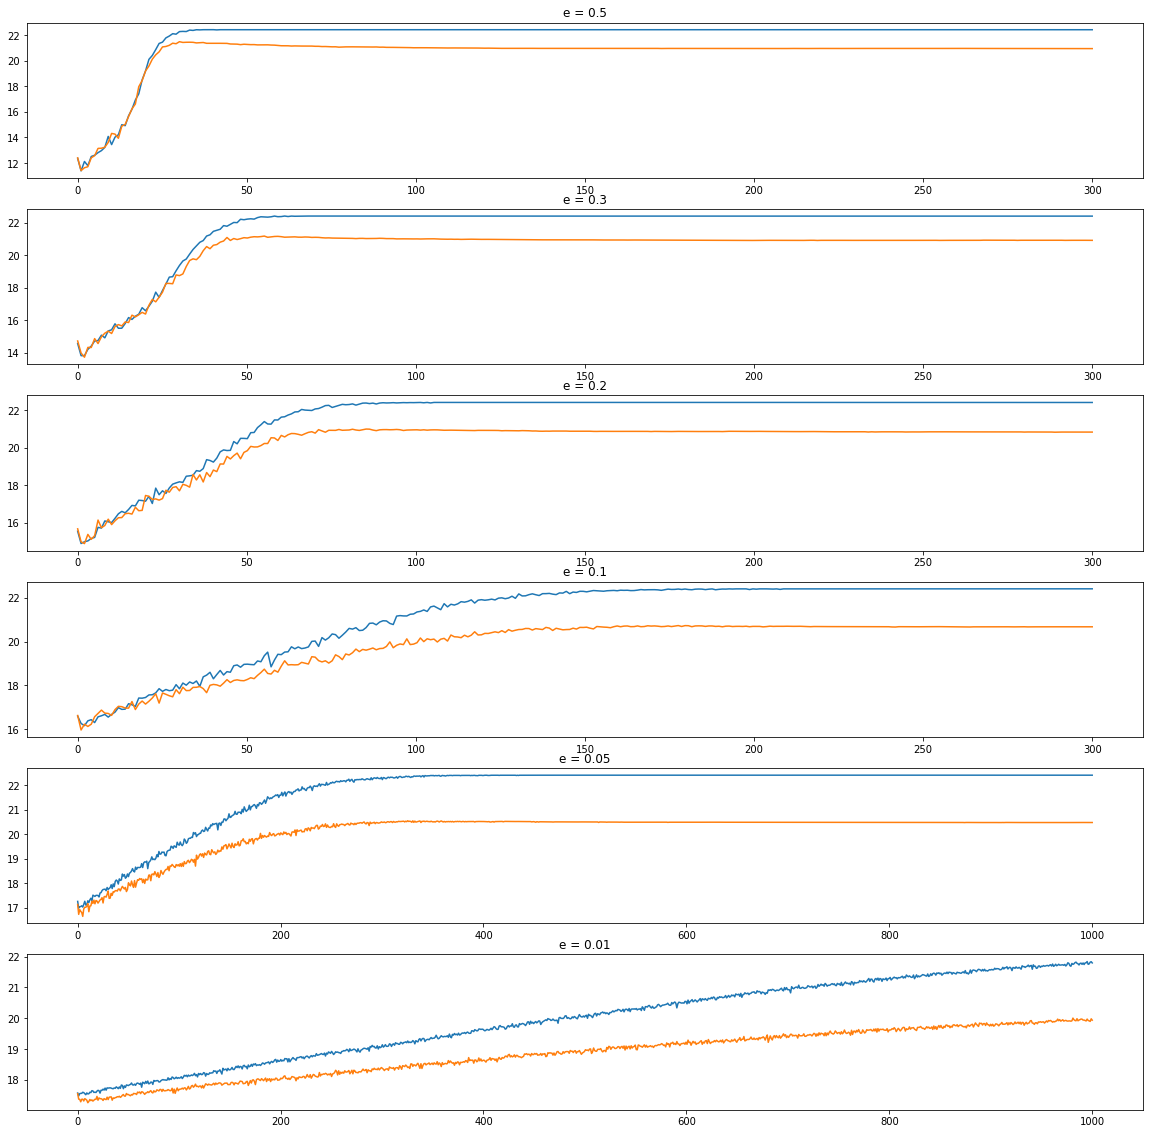

In [78]:
fig, axs = plt.subplots(6, figsize=(20,20))
#fig.set_xlabel('Steps')
#fig.set_ylabel('Average')

x = np.linspace(0, 300, 300)
axs[0].plot(x, Qt1_1[:300])
axs[0].plot(x, Qt1_10[:300])
axs[0].set_title('e = 0.5')

axs[1].plot(x, Qt2_1[:300])
axs[1].plot(x, Qt2_10[:300])
axs[1].set_title('e = 0.3')

axs[2].plot(x, Qt3_1[:300])
axs[2].plot(x, Qt3_10[:300])
axs[2].set_title('e = 0.2')

axs[3].plot(x, Qt4_1[:300])
axs[3].plot(x, Qt4_10[:300])
axs[3].set_title('e = 0.1')

x = np.linspace(0, 1000, 1000)
axs[4].plot(x, Qt5_1)
axs[4].plot(x, Qt5_10)
axs[4].set_title('e = 0.05')

axs[5].plot(x, Qt6_1)
axs[5].plot(x, Qt6_10)
axs[5].set_title('e = 0.01')

Having a higher episilon value helps the model to reach the optimum level quickly. This is because when epsilon value is higher the exploration is done with higher probability

### Generating plot for a single instant UCB

In [79]:
import math
import sys
import numpy as np

def simulation_for_one_ucb(c, std_dev):
    Qt = []
    Q = [0]*10
    N = [0]*10
    ucb = [sys.maxsize] * 10
    
    for i in range(1, 1001):
        action = np.argmax(ucb)
        reward = generate_reward(action, std_dev)
        N[action] += 1
        Q[action] = Q[action] + (1/N[action])*(reward-Q[action])
        ucb[action] = Q[action] + c * np.sqrt(np.log(i)/N[action])
        Qt.append(ucb[action])
    return Q, N, Qt

Trying out for multiple values of c = [0.1, 2, 10, 100] and plotting for first 300 time steps

Text(0.5, 1.0, 'c = 100')

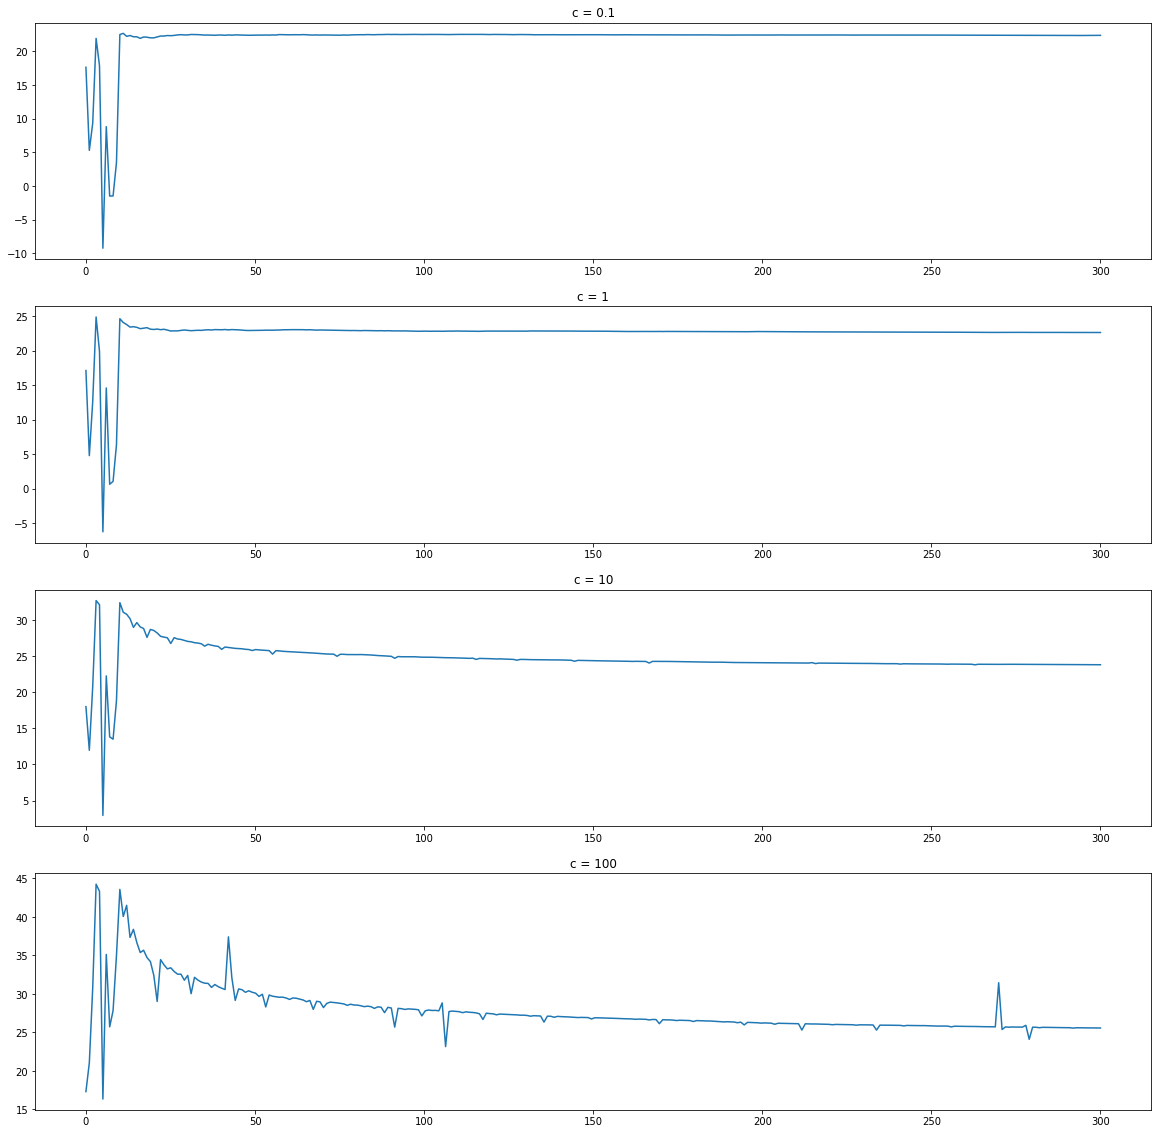

In [80]:
c = [0.1, 2, 10, 20]

Q1, N1, Qt1 = simulation_for_one_ucb(c[0], 1)
Q2, N2, Qt2 = simulation_for_one_ucb(c[1], 1)
Q3, N3, Qt3 = simulation_for_one_ucb(c[2], 1)
Q4, N4, Qt4 = simulation_for_one_ucb(c[3], 1)

fig, axs = plt.subplots(4, figsize=(20,20))
x = np.linspace(0, 300, 300)
axs[0].plot(x, Qt1[:300])
axs[0].set_title('c = 0.1')
axs[1].plot(x, Qt2[:300])
axs[1].set_title('c = 1')
axs[2].plot(x, Qt3[:300])
axs[2].set_title('c = 10')
axs[3].plot(x, Qt4[:300])
axs[3].set_title('c = 100')

### Generating UCB vs time plot for multiple simulations

In [81]:
def generate_multiple_simulations_ucb(c, std_dev):
    Qt_multiple = []
    for i in range(2000):
        _, _, Qt = simulation_for_one_ucb(c, std_dev)
        Qt_multiple.append(Qt)
    meanQt = np.array(Qt_multiple).mean(axis=0)
    return meanQt

In [82]:
c = [0.1, 0.5, 1, 2, 3, 5]

Qt1 = generate_multiple_simulations_ucb(c[0], 1)
Qt2 = generate_multiple_simulations_ucb(c[1], 1)
Qt3 = generate_multiple_simulations_ucb(c[2], 1)
Qt4 = generate_multiple_simulations_ucb(c[3], 1)
Qt5 = generate_multiple_simulations_ucb(c[4], 1)

Text(0.5, 1.0, 'c = 100')

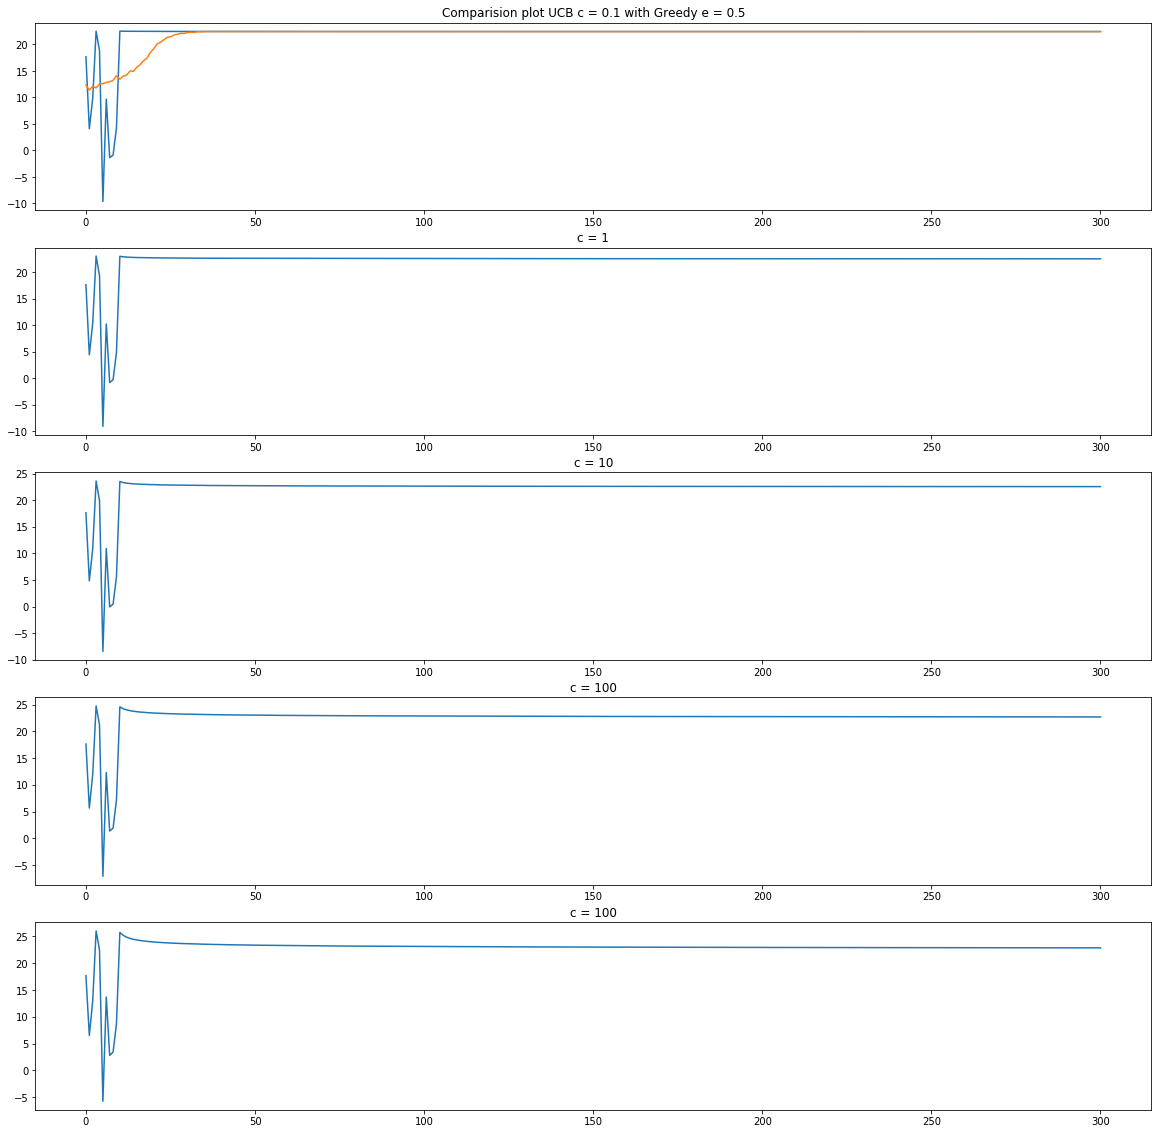

In [84]:
fig, axs = plt.subplots(5, figsize=(20,20))
x = np.linspace(0, 300, 300)
axs[0].plot(x, Qt1[:300])
axs[0].plot(x, Qt1_1[:300])
axs[0].set_title('Comparision plot UCB c = 0.1 with Greedy e = 0.5')
axs[1].plot(x, Qt2[:300])
axs[1].set_title('c = 1')
axs[2].plot(x, Qt3[:300])
axs[2].set_title('c = 10')
axs[3].plot(x, Qt4[:300])
axs[3].set_title('c = 100')
axs[4].plot(x, Qt5[:300])
axs[4].set_title('c = 100')

Observation : <b>The more the value of c, more time it takes to find the maxmimum optimal reward.<b>

The c value acts as and upperbound to the values to Qt. So higher the c value, the more optimistic we are about the estimation of qt.